In [24]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
from sklearn.datasets import load_digits
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.linear_model import SGDClassifier

In [1]:
mnist = load_digits()
print(mnist.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [2]:
print(mnist['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [20]:
# get the data
features,target = mnist['data'],mnist['target']
print(features.shape)
print(target.shape)

(1797, 64)
(1797,)


Text(0.5,1,'Digit: 2')

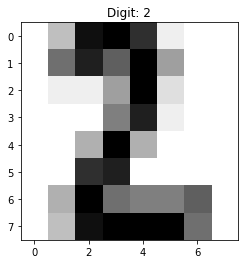

In [21]:
# view a sample
pixelsOnSide = int(math.sqrt(features.shape[-1]))
samp = features[1211,:].reshape(pixelsOnSide,pixelsOnSide)
plt.imshow(samp,cmap = matplotlib.cm.binary,interpolation='nearest')
plt.title('Digit: %d'%target[1211])

In [22]:
# get the frequency of digits
print(pd.Series(target).value_counts().sort_index())

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64


# Now let's do some modeling

In [26]:
# set up for cross validation
cvSplits = 100
cvRandState = 1906
trainPer = 0.8
sss=StratifiedShuffleSplit(n_splits=cvSplits,random_state=cvRandState,train_size=trainPer,test_size=1-trainPer)

# set up the classification model
clf = SGDClassifier(n_jobs=-1)

# cross-validation scoring
cvs = cross_val_score(estimator=clf,X=features,y=target,cv=sss,n_jobs=-1,scoring=None)# need to find a scorer
mnScore = cvs.mean()
print('Mean Classification Rate: %0.2f'%mnScore)
print(cvs)

/home/ahowe42/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ahowe42/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ahowe42/

Mean Classification Rate: 0.93
[0.93888889 0.94166667 0.925      0.95277778 0.925      0.925
 0.95       0.94722222 0.95277778 0.93611111 0.90833333 0.94444444
 0.95555556 0.92222222 0.86944444 0.88611111 0.90833333 0.925
 0.90833333 0.91111111 0.94722222 0.90277778 0.91111111 0.95277778
 0.88611111 0.93055556 0.89444444 0.90555556 0.92777778 0.88611111
 0.90277778 0.91944444 0.92777778 0.92777778 0.87222222 0.89722222
 0.94444444 0.95277778 0.93333333 0.95       0.96666667 0.93055556
 0.90833333 0.94444444 0.93611111 0.93055556 0.93055556 0.94166667
 0.95277778 0.91944444 0.90555556 0.96111111 0.93333333 0.93055556
 0.91388889 0.88055556 0.95833333 0.91111111 0.92222222 0.925
 0.93611111 0.925      0.97222222 0.92777778 0.91944444 0.90833333
 0.93611111 0.91111111 0.92777778 0.94722222 0.925      0.9
 0.92777778 0.94444444 0.91111111 0.94166667 0.94722222 0.91944444
 0.92777778 0.91388889 0.87777778 0.91944444 0.91388889 0.94166667
 0.91944444 0.96666667 0.94722222 0.94166667 0.944444